# Log Likelihood Example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p =  0.6541  prob =  1.0
15 26 24 18
16.381564913539236 24.130315118764607 23.261974608108257 19.226145359587907
Chi^2 =  0.36299728724814306


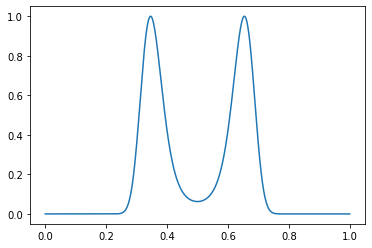

In [7]:
n1 = 15
n2 = 26
n3 = 24
n4 = 18

ntotal = n1+n2+n3+n4

niter=10000;
p = []
q = []
prob = []

pmax=0.0
imax = 0

for i in range(niter):
    p.append(1.0*i/niter)
    q.append(1.0 - p[i])
    
    p1 = pow(p[i],4)+pow(q[i],4)
    p2 = 4.0*p[i]*q[i]*(pow(p[i],3) + pow(q[i],3))
    p3 = 10.0*pow(p[i],2)*pow(q[i],2)*(pow(p[i],2) + pow(q[i],2))
    p4 = 20.0*pow(p[i],3)*pow(q[i],3)
    
    #p1 = p[i]**2
    #p2 = p[i]*q[i]
    #p3 = q[i]*p[i]
    #p4 = q[i]**2
    
    prob.append(pow(p1,n1)*pow(p2,n2)*pow(p3,n3)*pow(p4,n4))
    if (prob[i] >= pmax and p[i] > 0.5):
        pmax = prob[i]
        imax = i

prob = np.array(prob)
p = np.array(p)

prob = prob/pmax
print ("p = ",p[imax]," prob = ",prob[imax])

p1 = pow(p[imax],4)+pow(q[imax],4)
p2 = 4.0*p[imax]*q[imax]*(pow(p[imax],3) + pow(q[imax],3))
p3 = 10.0*pow(p[imax],2)*pow(q[imax],2)*(pow(p[imax],2) + pow(q[imax],2))
p4 = 20.0*pow(p[imax],3)*pow(q[imax],3)

#p1 = p[imax]**2
#p2 = p[imax]*q[imax]
#p3 = q[imax]*p[imax]
#p4 = q[imax]**2

n1t = ntotal*p1
n2t = ntotal*p2
n3t = ntotal*p3
n4t = ntotal*p4
chi2 = pow((n1-n1t),2)/n1t
chi2 += pow((n2-n2t),2)/n2t
chi2 += pow((n3-n3t),2)/n3t
chi2 += pow((n4-n4t),2)/n4t

print (n1,n2,n3,n4)
print (n1t,n2t,n3t,n4t)
print ("Chi^2 = ",chi2)

plt.plot(p,prob)
plt.show()